# Aspect Based Sentiment Analysis with Ice Cream Database

Avisenna Abimanyu (13517010)
Muhammad Akmal (13517028)
Muhammad Nurdin Husen (13517112)

import library

In [1]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
from collections import Counter
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#download the treebank corpus from nltk
nltk.download('treebank')
 
#download the universal tagset from nltk
nltk.download('universal_tagset')
 


[nltk_data] Downloading package treebank to /Users/akmalm/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/akmalm/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [3]:
# pd.options.display.max_rows = None
df = pd.read_csv('reviews.csv')

In [4]:
df.head(10)

,brand,key,author,date,stars,title,helpful_yes,helpful_no,text,taste,ingredients,texture,likes
0,bj,0_bj,Ilovebennjerry,2017-04-15,3,Not enough brownies!,10.0,3.0,"Super good, don't get me wrong. But I came for...",NaN,NaN,NaN,NaN
1,bj,0_bj,Sweettooth909,2020-01-05,5,I’m OBSESSED with this pint!,3.0,0.0,I decided to try it out although I’m not a hug...,NaN,NaN,NaN,NaN
2,bj,0_bj,LaTanga71,2018-04-26,3,My favorite...More Caramel Please,5.0,2.0,My caramel core begins to disappear about half...,NaN,NaN,NaN,NaN
3,bj,0_bj,chicago220,2018-01-14,5,Obsessed!!!,24.0,1.0,Why are people complaining about the blonde br...,NaN,NaN,NaN,NaN
4,bj,0_bj,Kassidyk,2020-07-24,1,Worst Ice Cream Ever!,1.0,5.0,This ice cream is worst ice cream I’ve ever ta...,NaN,NaN,NaN,NaN
5,bj,0_bj,Nikiera,2020-07-23,2,Way Too Salty,3.0,1.0,I bought this last night to go with Louisiana ...,NaN,NaN,NaN,NaN
6,bj,0_bj,Mmelvin,2017-05-28,3,"Love this flavor, but...",3.0,3.0,"This is definitely my favorite flavor, but rec...",NaN,NaN,NaN,NaN
7,bj,0_bj,Shay10,2017-07-02,3,Really Wanted To Love This,4.0,1.0,"I am not a chocolate person at all, and this w...",NaN,NaN,NaN,NaN
8,bj,0_bj,caramel4dayz,2017-07-16,2,Could be better.,8.0,6.0,"I LOVE caramel, so much so that I could eat it...",NaN,NaN,NaN,NaN
9,bj,0_bj,RosaT777,2019-02-12,3,Salted Caramel core had NO CARAMEL,1.0,1.0,I love all the Ben & Jerry’s flavor. But recen...,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,stars,helpful_yes,helpful_no,taste,ingredients,texture
count,21674.000000,21674.000000,21674.000000,4265.000000,4265.000000,4265.000000
mean,4.223955,1.364815,0.443019,4.234701,4.323798,4.284642
std,1.384121,8.234123,2.568762,1.401392,1.298888,1.363423
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,4.000000,0.000000,0.000000,4.000000,4.000000,4.000000
50%,5.000000,0.000000,0.000000,5.000000,5.000000,5.000000
75%,5.000000,1.000000,0.000000,5.000000,5.000000,5.000000
max,5.000000,421.000000,121.000000,5.000000,5.000000,5.000000


Mengambil kolom yang dibutuhkan

In [6]:
df_training = df.drop(columns=['brand', 'key', 'author', 'date', 'helpful_yes', 'helpful_no', 'taste', 'ingredients', 'texture', 'likes'])

### 0. Exploratory Data Analysis

In [7]:
df_training.head()
df_training.describe()

,stars
count,21674.000000
mean,4.223955
std,1.384121
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [8]:
df_training.shape

(21674, 3)

In [9]:
df_training.drop_duplicates(inplace=True)
df_training.shape

(21616, 3)

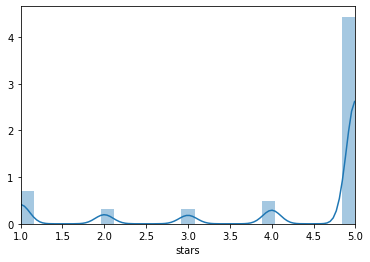

In [10]:
sns.distplot(df_training["stars"], bins=25)
plt.xlim([1,5])
plt.show()

In [11]:
df_training['stars'] = (df['stars'] >= 3).astype(int)
df_training.head()

,stars,title,text
0,1,Not enough brownies!,"Super good, don't get me wrong. But I came for..."
1,1,I’m OBSESSED with this pint!,I decided to try it out although I’m not a hug...
2,1,My favorite...More Caramel Please,My caramel core begins to disappear about half...
3,1,Obsessed!!!,Why are people complaining about the blonde br...
4,0,Worst Ice Cream Ever!,This ice cream is worst ice cream I’ve ever ta...


In [12]:
df_training.rename(columns={'stars': 'sentiment'}).head()

,sentiment,title,text
0,1,Not enough brownies!,"Super good, don't get me wrong. But I came for..."
1,1,I’m OBSESSED with this pint!,I decided to try it out although I’m not a hug...
2,1,My favorite...More Caramel Please,My caramel core begins to disappear about half...
3,1,Obsessed!!!,Why are people complaining about the blonde br...
4,0,Worst Ice Cream Ever!,This ice cream is worst ice cream I’ve ever ta...


In [13]:
df_training.describe()
df_training.shape

(21616, 3)

### 1. Preprocessing

In [14]:
def word_tokenize(sentence):
    return nltk.word_tokenize(sentence.lower())

def process_text(text_input):
    clean_text = text_input
    nopunc=[char for char in clean_text if char not in string.punctuation] # menghilangkan punctuation
    nopunc=''.join(nopunc)
    clean_text = [word for word in nopunc.split() if word not in stopwords.words('english')] # menghilangkan stopwords
    wordnet_lemmatizer = WordNetLemmatizer()
    clean_text = [wordnet_lemmatizer.lemmatize(word) for word in clean_text] # lemmatization
    return ' '.join(clean_text)



In [15]:
df_training['text'] = df_training['text'].apply(word_tokenize)

In [16]:
df_training.head()

,stars,title,text
0,1,Not enough brownies!,"[super, good, ,, do, n't, get, me, wrong, ., b..."
1,1,I’m OBSESSED with this pint!,"[i, decided, to, try, it, out, although, i, ’,..."
2,1,My favorite...More Caramel Please,"[my, caramel, core, begins, to, disappear, abo..."
3,1,Obsessed!!!,"[why, are, people, complaining, about, the, bl..."
4,0,Worst Ice Cream Ever!,"[this, ice, cream, is, worst, ice, cream, i, ’..."


In [17]:
# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))
#print each word with its respective tag for first two sentences
for sent in nltk_data[:2]:
  for tuple in sent:
    print(tuple)

('Pierre', 'NOUN')
('Vinken', 'NOUN')
(',', '.')
('61', 'NUM')
('years', 'NOUN')
('old', 'ADJ')
(',', '.')
('will', 'VERB')
('join', 'VERB')
('the', 'DET')
('board', 'NOUN')
('as', 'ADP')
('a', 'DET')
('nonexecutive', 'ADJ')
('director', 'NOUN')
('Nov.', 'NOUN')
('29', 'NUM')
('.', '.')
('Mr.', 'NOUN')
('Vinken', 'NOUN')
('is', 'VERB')
('chairman', 'NOUN')
('of', 'ADP')
('Elsevier', 'NOUN')
('N.V.', 'NOUN')
(',', '.')
('the', 'DET')
('Dutch', 'NOUN')
('publishing', 'VERB')
('group', 'NOUN')
('.', '.')


In [18]:
# nltk_data[2][0]
for i in range(len(nltk_data)):
    for j in range(len(nltk_data[i])):
        if (j == 0):
            nltk_data[i][j] = nltk_data[i][j] + ('S',)
        elif (j == len(nltk_data[i]) - 1):
            nltk_data[i][j] = nltk_data[i][j] + ('E',)
        else:
            nltk_data[i][j] = nltk_data[i][j] + (nltk_data[i][j][1],)
        # print(nltk_data[i][0])
        # print(nltk_data[i][len(nltk_data[i]) - 1])

In [19]:
print(nltk_data[1][1][1])

NOUN


In [20]:
# split data into training and validation set in the ratio 80:20
train_set,test_set =train_test_split(nltk_data,train_size=0.80,test_size=0.20,random_state = 101)


In [21]:
print(train_set[1])

[('At', 'ADP', 'S'), ('last', 'ADJ', 'ADJ'), ('count', 'NOUN', 'NOUN'), (',', '.', '.'), ('Candela', 'NOUN', 'NOUN'), ('had', 'VERB', 'VERB'), ('sold', 'VERB', 'VERB'), ('$', '.', '.'), ('4', 'NUM', 'NUM'), ('million', 'NUM', 'NUM'), ('*U*', 'X', 'X'), ('of', 'ADP', 'ADP'), ('its', 'PRON', 'PRON'), ('medical', 'ADJ', 'ADJ'), ('devices', 'NOUN', 'NOUN'), ('in', 'ADP', 'ADP'), ('Japan', 'NOUN', 'NOUN'), ('.', '.', 'E')]


In [22]:
# create list of train and test tagged words
train_tagged_words = [ tup for sent in train_set for tup in sent ]
test_tagged_words = [ tup for sent in test_set for tup in sent ]
print(len(train_tagged_words))
print(len(test_tagged_words))

80310
20366


In [23]:
print(train_tagged_words[0])

('Drink', 'NOUN', 'S')


In [24]:
# check some of the tagged words.
train_tagged_words[:5]

[('Drink', 'NOUN', 'S'),
 ('Carrier', 'NOUN', 'NOUN'),
 ('Competes', 'VERB', 'VERB'),
 ('With', 'ADP', 'ADP'),
 ('Cartons', 'NOUN', 'E')]

In [25]:
#use set datatype to check how many unique tags are present in training data
tags = {tag1 for word,tag1,tag2 in train_tagged_words}
print(len(tags))
tags.add('S')
tags.add('E')
print(tags)

# check total words in vocabulary
vocab = {word for word,tag1,tag2 in train_tagged_words}

12
{'NUM', 'ADP', 'ADV', 'S', 'DET', 'PRT', '.', 'VERB', 'CONJ', 'E', 'ADJ', 'X', 'PRON', 'NOUN'}


In [26]:
tag_list = [pair for pair in train_tagged_words if pair[1]=='NOUN']
tag_list[:5]

[('Drink', 'NOUN', 'S'),
 ('Carrier', 'NOUN', 'NOUN'),
 ('Cartons', 'NOUN', 'E'),
 ('count', 'NOUN', 'NOUN'),
 ('Candela', 'NOUN', 'NOUN')]

In [27]:
# compute Emission Probability
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    # print(tag_list)
    count_tag = len(tag_list)#total number of times the passed tag occurred in train_bag
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
#now calculate the total number of times the passed word occurred as the passed tag.
    count_w_given_tag = len(w_given_tag_list)
 
    return (count_w_given_tag, count_tag)

In [28]:
print(word_given_tag('Mr.', 'S'))

(0, 0)


Isunya harus di lowercase kyknya, trus kyk I'm dan singkatan2 gitu dibenerin supaya pos tag nya bisa lebih bagus

In [29]:
# compute  Transition Probability
def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    if (t1 == 'S' or t2 == 'E'):
        tags = [pair[2] for pair in train_bag]
        # print(tags)
        count_t1 = len([t for t in tags if t==t1])
        count_t2_t1 = 0
        for index in range(len(tags)-1):
            if tags[index]==t1 and tags[index+1] == t2:
                count_t2_t1 += 1
        return (count_t2_t1, count_t1)
    else:
        tags = [pair[1] for pair in train_bag]
        # print(tags)
        count_t1 = len([t for t in tags if t==t1])
        count_t2_t1 = 0
        for index in range(len(tags)-1):
            if tags[index]==t1 and tags[index+1] == t2:
                count_t2_t1 += 1
        return (count_t2_t1, count_t1)

In [30]:
print(t2_given_t1('NOUN', 'S'))

(1364, 3131)


In [31]:
# creating t x t transition matrix of tags, t= no of tags
# Matrix(i, j) represents P(jth tag after the ith tag)
 
tags_matrix = np.zeros((len(tags), len(tags)), dtype='float32')
for i, t1 in enumerate(list(tags)):
    for j, t2 in enumerate(list(tags)): 
        if (t2_given_t1(t2,t1)[1] == 0) or (t1 == 'S' and t2 == 'S'):
            tags_matrix[i, j] = 0
        else:
            tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]
 
print(tags_matrix)

[[1.84219927e-01 3.74866128e-02 3.57015361e-03 0.00000000e+00
  3.57015361e-03 2.60621198e-02 1.19243130e-01 2.07068902e-02
  1.42806144e-02 5.12080789e-02 3.53445187e-02 2.02427700e-01
  1.42806140e-03 3.51660132e-01]
 [6.32751212e-02 1.69577319e-02 1.45532778e-02 0.00000000e+00
  3.20931405e-01 1.26550242e-03 3.87243740e-02 8.47886596e-03
  1.01240189e-03 3.20726982e-03 1.07061505e-01 3.45482156e-02
  6.96026310e-02 3.23588967e-01]
 [2.98681147e-02 1.19472459e-01 8.14584941e-02 0.00000000e+00
  7.13731572e-02 1.47401085e-02 1.39255241e-01 3.39022487e-01
  6.98215654e-03 3.68988402e-02 1.30721495e-01 2.28859577e-02
  1.20248254e-02 3.21955010e-02]
 [1.98019799e-02 4.47141491e-02 3.09805181e-02 0.00000000e+00
  8.84701386e-02 1.69274993e-02 5.58926873e-02 1.54583201e-01
  6.70712255e-03 5.11018839e-03 7.02650920e-02 2.20376868e-02
  4.85467911e-02 4.35643554e-01]
 [2.28546783e-02 9.91806854e-03 1.20741697e-02 0.00000000e+00
  6.03708485e-03 2.87480245e-04 1.73925534e-02 4.02472317e-02


In [32]:
# convert the matrix to a df for better readability
#the table is same as the transition table shown in section 3 of article
tags_df = pd.DataFrame(tags_matrix, columns = list(tags), index=list(tags))
display(tags_df)

,NUM,ADP,ADV,S,DET,PRT,.,VERB,CONJ,E,ADJ,X,PRON,NOUN
NUM,0.184220,0.037487,0.003570,0.0,0.003570,0.026062,0.119243,0.020707,0.014281,0.051208,0.035345,0.202428,0.001428,0.351660
ADP,0.063275,0.016958,0.014553,0.0,0.320931,0.001266,0.038724,0.008479,0.001012,0.003207,0.107062,0.034548,0.069603,0.323589
ADV,0.029868,0.119472,0.081458,0.0,0.071373,0.014740,0.139255,0.339022,0.006982,0.036899,0.130721,0.022886,0.012025,0.032196
S,0.019802,0.044714,0.030981,0.0,0.088470,0.016927,0.055893,0.154583,0.006707,0.005110,0.070265,0.022038,0.048547,0.435644
DET,0.022855,0.009918,0.012074,0.0,0.006037,0.000287,0.017393,0.040247,0.000431,0.001605,0.206411,0.045134,0.003306,0.635906
PRT,0.056751,0.019569,0.009393,0.0,0.101370,0.001174,0.045010,0.401174,0.002348,0.003922,0.082975,0.012133,0.017613,0.250489
.,0.078210,0.092908,0.052569,0.0,0.172192,0.002789,0.092372,0.089690,0.060079,0.036217,0.046132,0.025641,0.068769,0.218539
VERB,0.022836,0.092357,0.083886,0.0,0.133610,0.030663,0.034807,0.167956,0.005433,0.007944,0.066390,0.215930,0.035543,0.110589
CONJ,0.040615,0.055982,0.057080,0.0,0.123491,0.004391,0.035126,0.150384,0.000549,0.000604,0.113611,0.009330,0.060373,0.349067
E,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Karena udah ada transition dan emission, maka dilakukan pos tagging pada token-token yang ada di df_training

In [33]:
print(tags_df['CONJ']['S']) # artinya probability trasition CONJ setelah S

0.0067071225


In [34]:
token = df_training.iloc[1,2]
print(token)

['i', 'decided', 'to', 'try', 'it', 'out', 'although', 'i', '’', 'm', 'not', 'a', 'huge', 'caramel', 'fan', ',', 'and', 'the', 'first', 'buy', 'was', 'ok', ',', 'didn', '’', 't', 'like', 'the', 'caramel', 'too', 'much', 'and', 'for', 'some', 'reason', 'that', 'specific', 'pint', 'barely', 'had', 'any', 'brownies', '!', 'like', 'there', 'were', 'some', 'on', 'top', 'but', 'from', 'the', 'middle', 'to', 'the', 'bottom', '?', 'zilch', '.', 'nada', '.', 'nothing', '!', 'it', 'was', 'disappointing', '.', 'but', 'for', 'some', 'reason', ',', 'i', 'bought', 'it', 'again', 'and', 'i', 'really', 'do', 'believe', 'it', 'was', 'just', 'that', 'point', 'bcuz', 'the', 'second', 'one', 'was', 'glorious', '!', '!', 'i', 'had', 'a', 'big', 'brownie', 'chunk', 'in', 'every', 'bite', '.', 'plus', 'the', 'caramel', 'didn', '’', 't', 'bother', 'me', 'as', 'much', 'and', 'i', 'took', 'a', 'liking', 'to', 'it', '.', 'conclusion', ':', 'i', '’', 'm', 'on', 'my', 'fifth', 'pint', ',', 'of', 'the', 'week', 'an

In [35]:
# def pos_tagging(list_token):
print(len(token))

157


In [36]:
arr = np.zeros((len(token),len(tags),2), dtype=np.float32)
arr[0,1,1]
list_tag = list(tags)
print(list_tag)
# print(len(tags))
# emission in sentence
for i in range(len(token)):
    for j in range(len(tags)):
        # print(i,j)
        tup = word_given_tag(token[i],list_tag[j])
        # if ()
        if (tup[1] == 0):
            arr[i,j,0] = 0
        else:
            arr[i,j,0] = tup[0]/tup[1]

['NUM', 'ADP', 'ADV', 'S', 'DET', 'PRT', '.', 'VERB', 'CONJ', 'E', 'ADJ', 'X', 'PRON', 'NOUN']


In [37]:
print(arr)

[[[0.        0.       ]
  [0.        0.       ]
  [0.        0.       ]
  ...
  [0.        0.       ]
  [0.        0.       ]
  [0.        0.       ]]

 [[0.        0.       ]
  [0.        0.       ]
  [0.        0.       ]
  ...
  [0.        0.       ]
  [0.        0.       ]
  [0.        0.       ]]

 [[0.        0.       ]
  [0.0002531 0.       ]
  [0.        0.       ]
  ...
  [0.        0.       ]
  [0.        0.       ]
  [0.        0.       ]]

 ...

 [[0.        0.       ]
  [0.        0.       ]
  [0.        0.       ]
  ...
  [0.        0.       ]
  [0.        0.       ]
  [0.        0.       ]]

 [[0.        0.       ]
  [0.        0.       ]
  [0.        0.       ]
  ...
  [0.        0.       ]
  [0.        0.       ]
  [0.        0.       ]]

 [[0.        0.       ]
  [0.        0.       ]
  [0.        0.       ]
  ...
  [0.        0.       ]
  [0.        0.       ]
  [0.        0.       ]]]


In [38]:
a = np.zeros((3,5))
a
# a[0]
# for i in range(5):
#     print(i)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [39]:
# print(tags)
# list_tag = list(tags)
print(list_tag)

['NUM', 'ADP', 'ADV', 'S', 'DET', 'PRT', '.', 'VERB', 'CONJ', 'E', 'ADJ', 'X', 'PRON', 'NOUN']


In [43]:

def pos_tagger(tagged_words, untagged_words, command, prob_now, solutions):
    # kasus kata yg masuk kosong belom ditanganin
    # print(type(tagged_words))
    # print(not tagged_words)
    if (len(untagged_words) == 0 and command == 'FINISH'):
        #basis
        solutions.append((tagged_words, prob_now))
    else:
        # print('AAA')
        if (command == 'TRANSITION'):
            # do transition
            print('D')
            for tag in list_tag:
                if (not tagged_words):
                    if (tags_df[tag]['S'] > 0):
                        word_process = untagged_words.pop(0)
                        # print(word_process)
                        tagged_words = np.append(tagged_words, (word_process, tag))
                        pos_tagger(tagged_words, untagged_words, 'EMISSION', 
                            prob_now * tags_df[tag]['S'], solutions)
                elif (tags_df[tag][tagged_words[len(tagged_words) - 1][1]] > 0):
                    # print('B')
                    word_process = untagged_words.pop(0)
                    pos_tagger(tagged_words.append((word_process, tag)), untagged_words, 'EMISSION', 
                        prob_now * tags_df[tag][tagged_words[len(tagged_words) - 1][1]], solutions)
                elif (len(untagged_words) == 0):
                    # print('C')
                    if (tags_df['E'][tag] > 0):
                        # word_process = untagged_words.pop(0)
                        pos_tagger(tagged_words, untagged_words, 'FINISH', 
                            prob_now * tags_df['E'][tag], solutions)
        elif (command == 'EMISSION'):
            print('tagged words', tagged_words)
            # print(tagged_words[len(tagged_words) - 1][0])
            emission_temp = word_given_tag(tagged_words[len(tagged_words) - 1][0], tagged_words[len(tagged_words) - 1][1])
            print(emission_temp)
            if (emission_temp[0] / emission_temp[1] > 0):
                # print('A')
                pos_tagger(tagged_words, untagged_words, 'TRANSITION', prob_now * emission_temp, solutions)

In [44]:
sol = []
tagged_words = np.array([])
print(len(tagged_words))
print(token)
pos_tagger(tagged_words, token, 'TRANSITION', 1, sol)

# print(sol)

0
['decided', 'to', 'try', 'it', 'out', 'although', 'i', '’', 'm', 'not', 'a', 'huge', 'caramel', 'fan', ',', 'and', 'the', 'first', 'buy', 'was', 'ok', ',', 'didn', '’', 't', 'like', 'the', 'caramel', 'too', 'much', 'and', 'for', 'some', 'reason', 'that', 'specific', 'pint', 'barely', 'had', 'any', 'brownies', '!', 'like', 'there', 'were', 'some', 'on', 'top', 'but', 'from', 'the', 'middle', 'to', 'the', 'bottom', '?', 'zilch', '.', 'nada', '.', 'nothing', '!', 'it', 'was', 'disappointing', '.', 'but', 'for', 'some', 'reason', ',', 'i', 'bought', 'it', 'again', 'and', 'i', 'really', 'do', 'believe', 'it', 'was', 'just', 'that', 'point', 'bcuz', 'the', 'second', 'one', 'was', 'glorious', '!', '!', 'i', 'had', 'a', 'big', 'brownie', 'chunk', 'in', 'every', 'bite', '.', 'plus', 'the', 'caramel', 'didn', '’', 't', 'bother', 'me', 'as', 'much', 'and', 'i', 'took', 'a', 'liking', 'to', 'it', '.', 'conclusion', ':', 'i', '’', 'm', 'on', 'my', 'fifth', 'pint', ',', 'of', 'the', 'week', 'and',

ZeroDivisionError: division by zero

In [60]:
a = [1,2,3,4]
abc = a.pop(0)
# print(a.pop(0))
print(a)
print(abc)
b = []
b.append((abc, 'AAA'))
b.append((abc, 'BBB'))
print(b)

[2, 3, 4]
1
[(1, 'AAA'), (1, 'BBB')]
